In [ ]:
import token
import sys
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import double
from skimage import io
from PIL import Image
import colorsys

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=8000)

In [ ]:
I1 = cv.imread('/content/drive/My Drive/DIP-ESE558/Project2/Food.png')
M,N,C = I1.shape
I2 = cv.cvtColor(I1,cv.COLOR_RGB2GRAY)
#Normalise the values , values are normalized to improve the computations
#computations in cases where the image is passed through a deep neural network becomes more complex when
#we have higher values.

I6 = double(I1)/255.0

I7 = double(I2)/255.0

In [ ]:
theta = 120.0
A = np.array([[0.5 * math.cos(math.radians(theta)), -math.sin(math.radians(theta))],
[math.sin(math.radians(theta)), math.cos(math.radians(theta))]])
T = np.array([10, 5])

xr = 14 # Center of rotation
yr = 28

p = A.dot(np.array([1 - xr, 1 - yr]).T) + T + np.array([xr, yr]).T
x1, y1 = p[0], p[1]
p = A.dot(np.array([1 - xr, N - yr]).T) + T + np.array([xr, yr]).T
x2, y2 = p[0], p[1]
p = A.dot(np.array([M - xr, 1 - yr]).T) + T + np.array([xr, yr]).T
x3, y3 = p[0], p[1]
p = A.dot(np.array([M - xr, N - yr]).T) + T + np.array([xr, yr]).T
x4, y4 = p[0], p[1]

xmin = int(np.floor(min([x1, x2, x3, x4])))
xmax = int(np.ceil(max([x1, x2, x3, x4])))
ymin = int(np.floor(min([y1, y2, y3, y4])))
ymax = int(np.ceil(max([y1, y2, y3, y4])))
Mp = int(np.ceil(xmax - xmin) + 1)
Np = int(np.ceil(ymax - ymin) + 1)

I8 = np.zeros((Mp, Np))
I4 = np.zeros((Mp, Np, 3))

Ap = np.linalg.inv(A)

In [ ]:
for i in range(xmin, xmax+1):
  for j in range(ymin, ymax+1):
    p = Ap.dot(np.array([i, j]).T - T)
    x0, y0 = p[0], p[1]
    minx = int(np.floor(x0))
    maxx = int(np.ceil(x0))
    miny = int(np.floor(y0))
    maxy = int(np.ceil(y0))
    dx = x0 - minx
    dy = y0 - miny
    if (1 <= minx <= M) and (1 <= maxx <= M) and (1 <= miny <= N) and (1 <= maxy <= N):
      x = round(i - xmin + 1)
      y = round(j - ymin + 1)
      x_1 = (dx * I7[maxx-1, miny-1]) + ((1 - dx) * I7[minx-1, miny-1]) / (maxx - minx)
      x_2 = (dx * I7[maxx-1, maxy-1]) + ((1 - dx) * I7[minx-1, maxy-1]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)

      I8[x-1, y-1] = y_1

      x_1 = (dx * I6[maxx-1, miny-1, 0]) + ((1 - dx) * I6[minx-1, miny-1, 0]) / (maxx - minx)
      x_2 = (dx * I6[maxx-1, maxy-1, 0]) + ((1 - dx) * I6[minx-1, maxy-1, 0]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)

      I4[x-1, y-1, 0] = y_1

      x_1 = (dx * I6[maxx-1, miny-1, 1]) + ((1 - dx) * I6[minx-1, miny-1, 1]) / (maxx - minx)
      x_2 = (dx * I6[maxx-1, maxy-1, 1]) + ((1 - dx) * I6[minx-1, maxy-1, 1]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)

      I4[x-1, y-1, 1] = y_1

      x_1 = (dx * I6[maxx-1, miny-1, 2]) + ((1 - dx) * I6[minx-1, miny-1, 2]) / (maxx - minx)
      x_2 = (dx * I6[maxx-1, maxy-1, 2]) + ((1 - dx) * I6[minx-1, maxy-1, 2]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)

      I4[x-1, y-1, 2] = y_1


Original Image


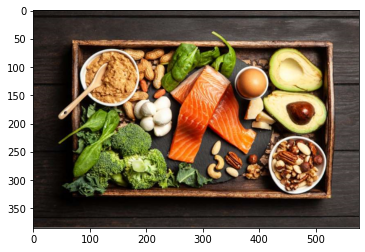

Rotated original image


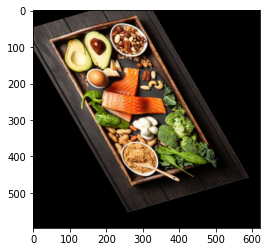

Grayscale Image:


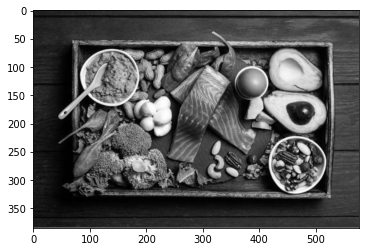

Rotated grayscale image


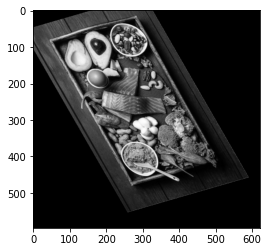

In [10]:
print("Original Image")
I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)
pixels = np.array(I1)
plt.imshow(pixels)
plt.show()


print("Rotated original image")
# I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)

img_float32 = np.float32(I4)
lab_image = cv.cvtColor(img_float32, cv.COLOR_BGR2RGB)
pixels = np.array(lab_image)

plt.imshow(pixels)
plt.show()


print("Grayscale Image:")
pixels = np.array(I2)
plt.imshow(pixels, cmap='gray')
plt.show()

print("Rotated grayscale image")

img_float32 = np.float32(I4)
lab_image = cv.cvtColor(img_float32, cv.COLOR_RGB2GRAY)
pixels = np.array(lab_image)

plt.imshow(pixels, cmap='gray')
plt.show()

